# **Libraries**

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
!pip install --upgrade tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support, mean_squared_error, mean_absolute_error
import numpy as np
import warnings

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


# **Data Preprocessing**

In [2]:
# Load the dataset
data = pd.read_csv("/content/Asthma_Dataset.csv")

# Inspect the dataset
print(data.info())
print(data.describe())

# Handle missing values
missing_values = data.isna().sum()
print("Missing values per column:\n", missing_values)

# Drop irrelevant columns
columns_to_drop = ["PatientID", "DoctorInCharge"]
data = data.drop(columns=columns_to_drop, errors='ignore')

# Drop duplicates
duplicates = data.duplicated().sum()
data = data.drop_duplicates()
print(f"Number of duplicates removed: {duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

# **Data Distribution**

<Figure size 1000x600 with 0 Axes>

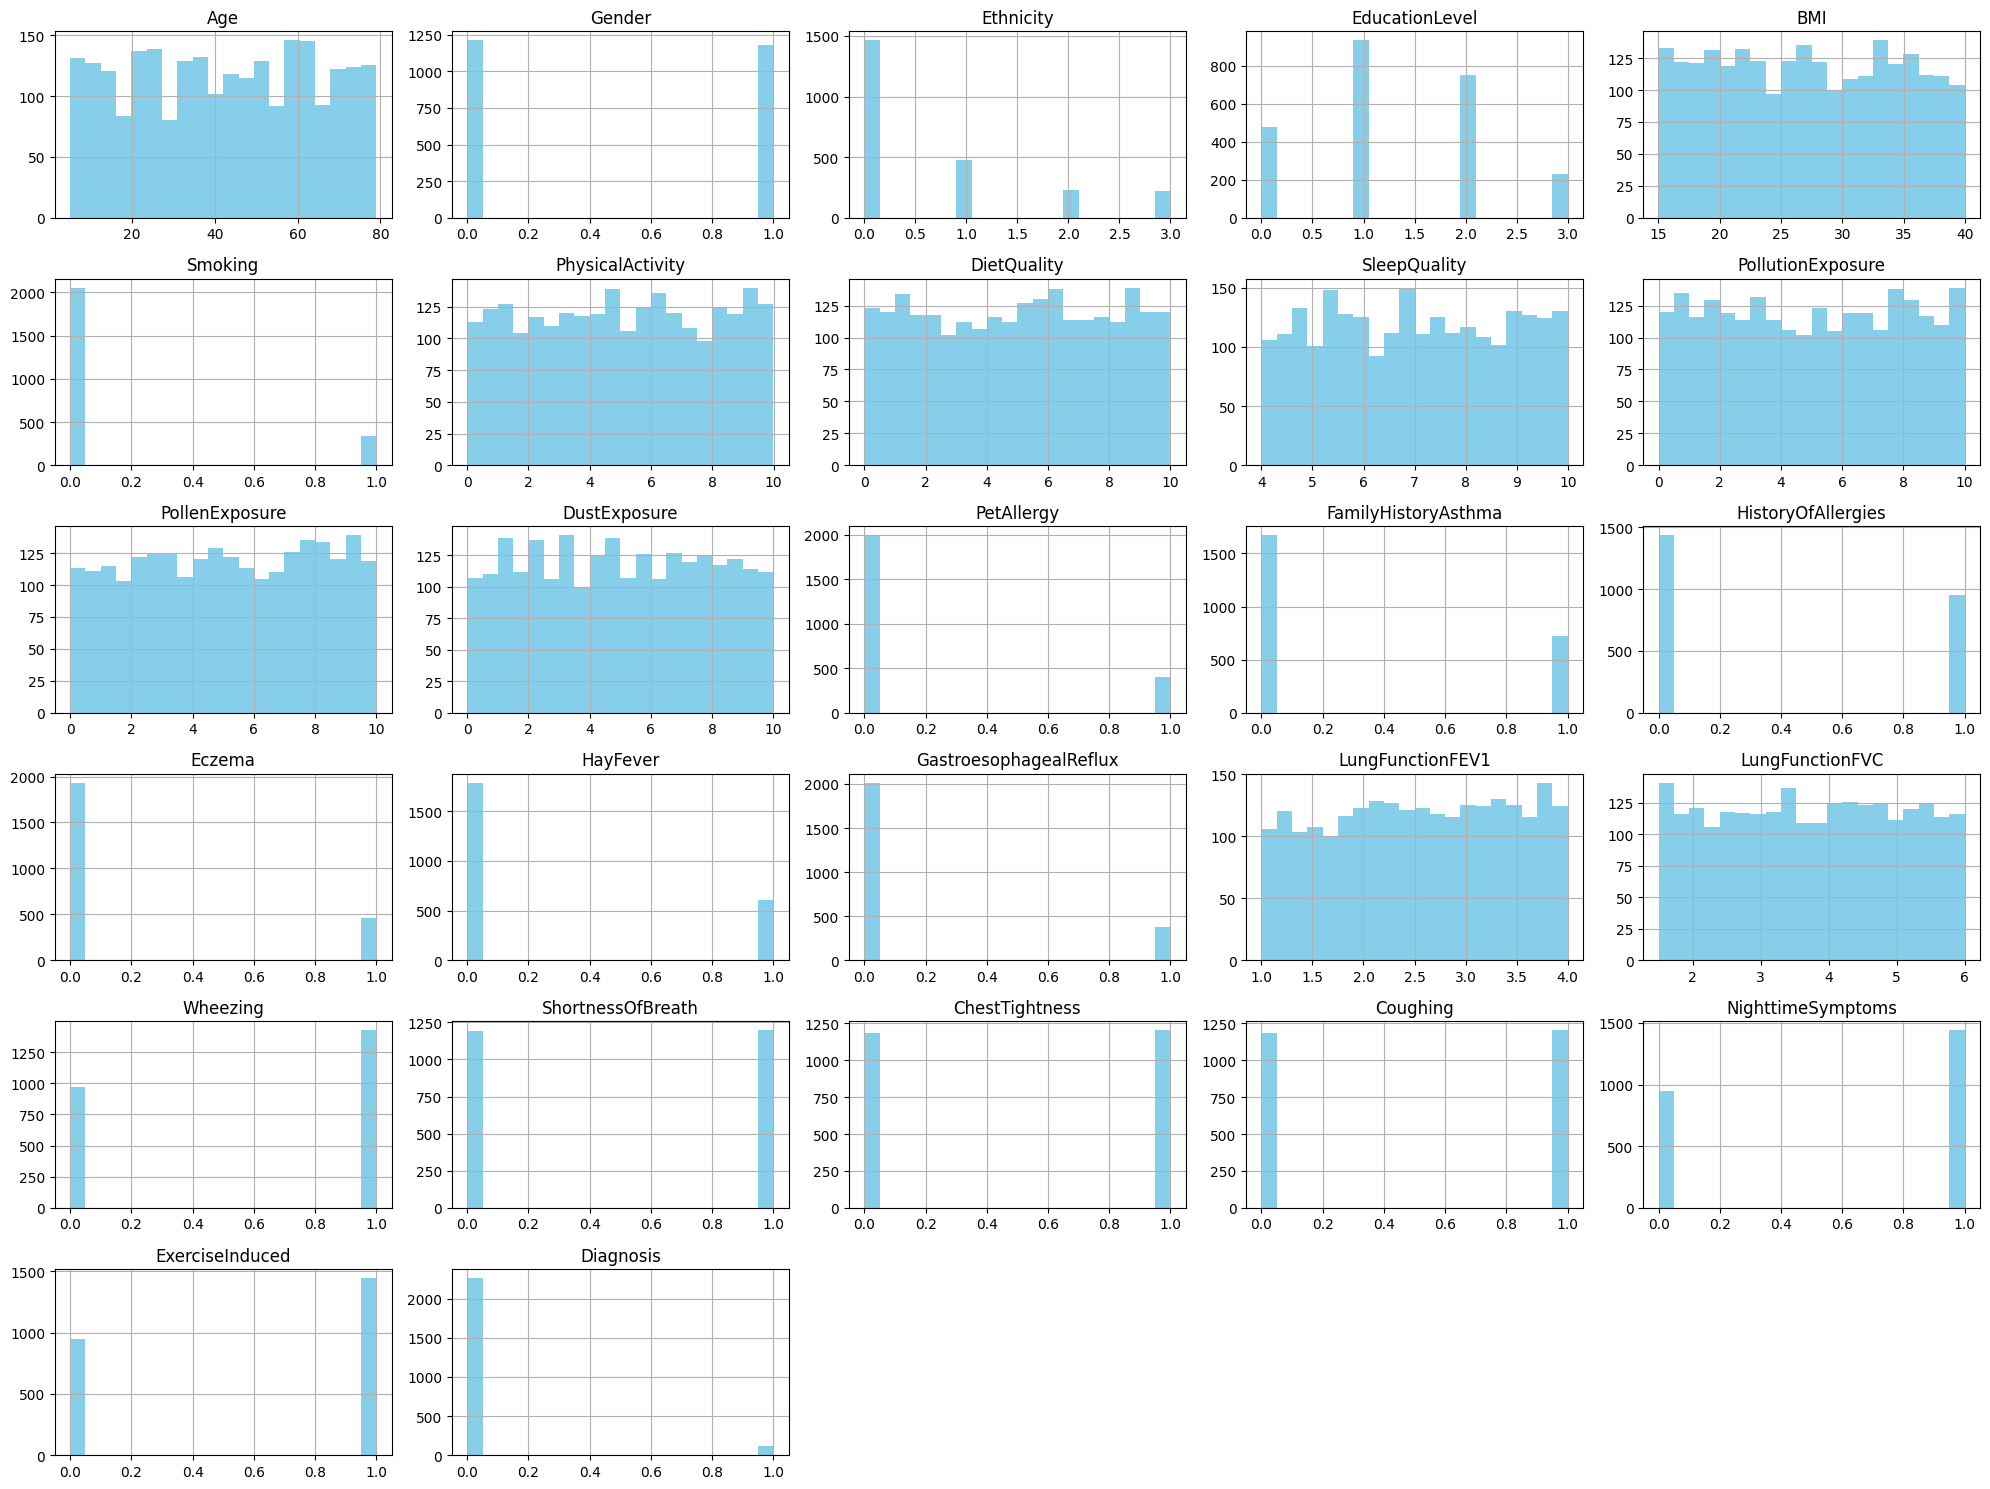

<Figure size 640x480 with 0 Axes>

In [3]:
# Encode categorical variables if present
categorical_cols = data.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Visualize data distribution
plt.figure(figsize=(10, 6))
data.hist(bins=20, figsize=(20, 15), color='skyblue')
plt.tight_layout()
plt.show()
plt.savefig('All_Data.png', dpi=600)

# **Split Feature**

In [4]:
# Split features and target
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# **Feature Selection Using Random Forest**

Top features based on Random Forest Importance: Index(['PollutionExposure', 'LungFunctionFVC', 'LungFunctionFEV1',
       'PhysicalActivity', 'DietQuality', 'BMI', 'PollenExposure',
       'SleepQuality', 'DustExposure', 'Age', 'EducationLevel', 'Ethnicity',
       'ChestTightness', 'Gender', 'ShortnessOfBreath', 'Wheezing',
       'NighttimeSymptoms', 'ExerciseInduced', 'GastroesophagealReflux',
       'Coughing'],
      dtype='object')


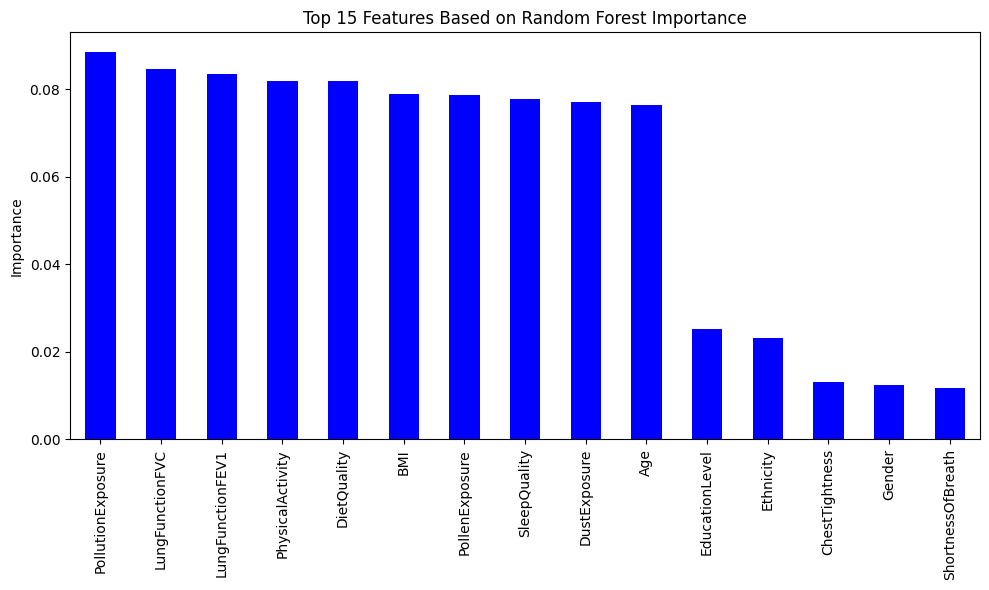

<ipython-input-5-015655640f03>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


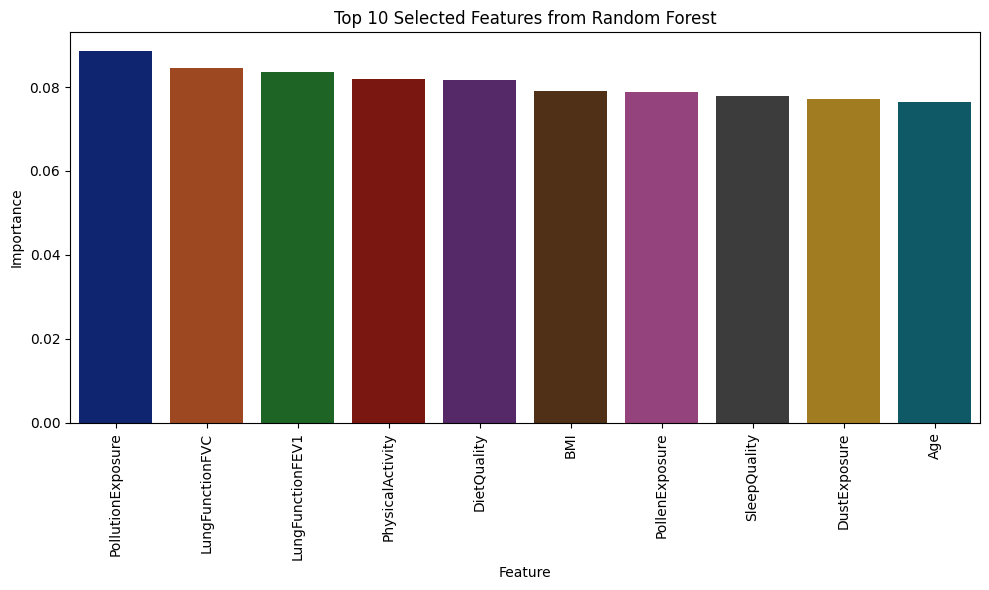

In [5]:
# Feature Selection: Random Forest Importance
rf_selector = RandomForestClassifier(random_state=1000)
rf_selector.fit(X, y)

# Calculate feature importances
feature_importances = pd.Series(rf_selector.feature_importances_, index=X.columns)

# Select top 20 features for further analysis
selected_rf_features = feature_importances.nlargest(20).index
print("Top features based on Random Forest Importance:", selected_rf_features)

# Visualize feature importance (Top 15 features)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(15).plot(kind='bar', color='blue')
plt.title("Top 15 Features Based on Random Forest Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig('Top_15_Important_Features.png', dpi=600)
plt.show()

# Visualize selected features (Top 10 features)
plt.figure(figsize=(10, 6))
colors = sns.color_palette('dark', n_colors=10)

sns.barplot(
    x=feature_importances[selected_rf_features].nlargest(10).index,
    y=feature_importances[selected_rf_features].nlargest(10).values,
    palette=colors
)
plt.title("Top 10 Selected Features from Random Forest")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig('Top_10_Selected_Features.png', dpi=600)
plt.show()

# **Data Split**

In [6]:
# Combining selected features
selected_features = list(set(selected_rf_features))
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# **Sampling Methods**

<ipython-input-7-97fc2e6ae5bf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.astype(str), palette=palette)  # Convert y to string


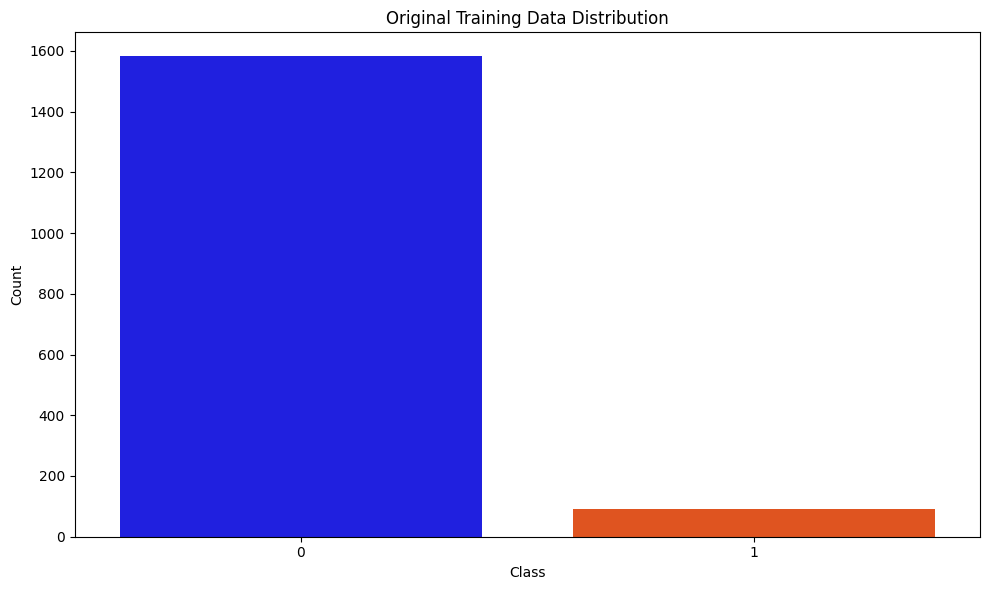

<ipython-input-7-97fc2e6ae5bf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.astype(str), palette=palette)  # Convert y to string


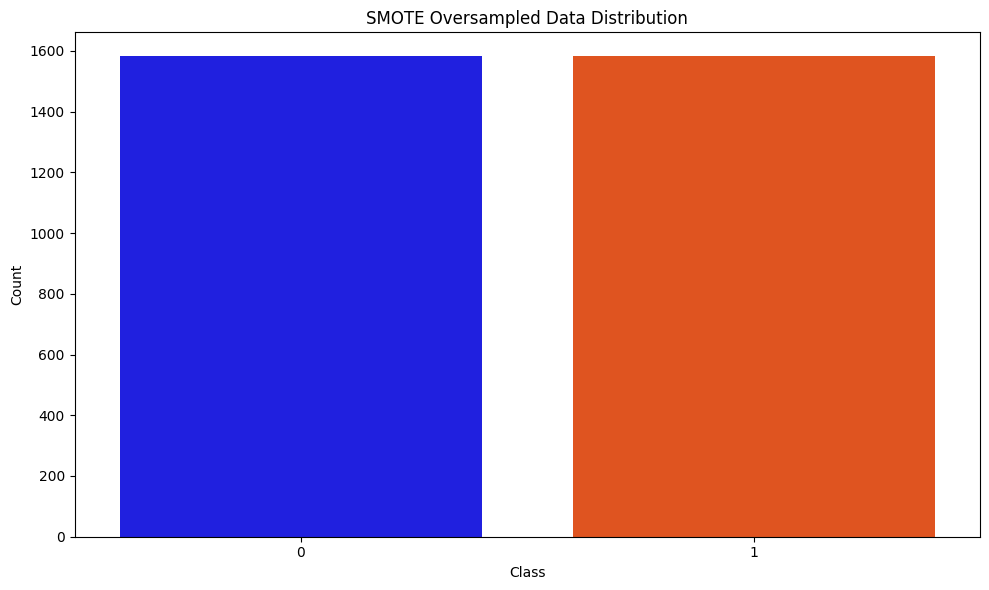

<ipython-input-7-97fc2e6ae5bf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.astype(str), palette=palette)  # Convert y to string


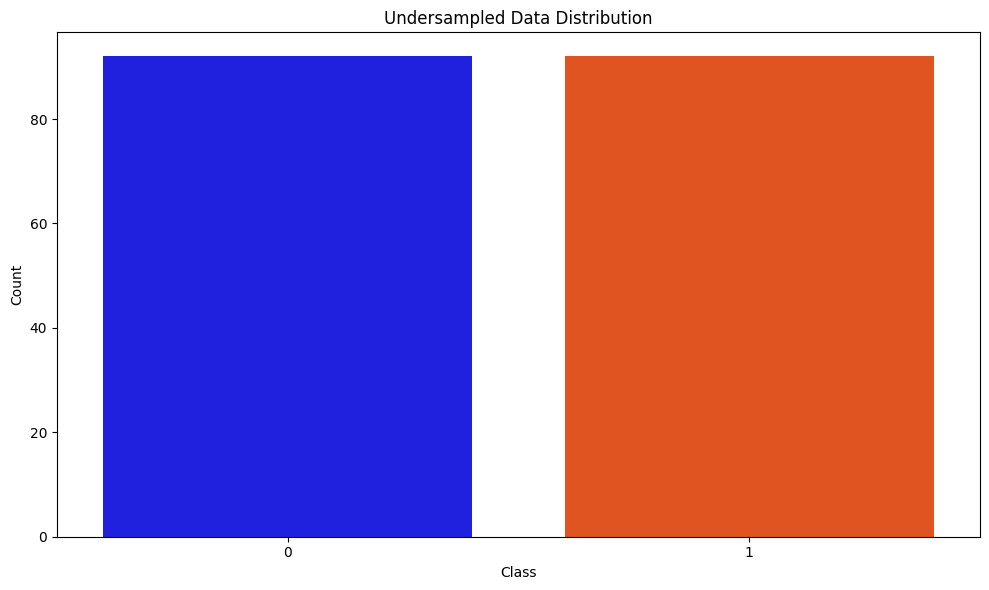

In [7]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Oversampling using SMOTE
smote = SMOTE(random_state=1500)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling
undersample = RandomUnderSampler(random_state=2000)
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X_train, y_train)

# Re-enable warnings after the operation
warnings.filterwarnings("default", category=FutureWarning)

# Function to visualize and save sampling distributions
def visualize_and_save_sampling_distribution(X, y, title, filename):
    plt.figure(figsize=(10, 6))
    # Set custom palette: 0 as blue, 1 as dark orange, converting labels to strings
    palette = {'0': "blue", '1': "orangered"}
    sns.countplot(x=y.astype(str), palette=palette)  # Convert y to string
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(filename, dpi=600)
    plt.show()

# Visualize and save each distribution as a separate image
visualize_and_save_sampling_distribution(X_train, y_train,
                                         "Original Training Data Distribution",
                                         "Original_Training_Data_Distribution.png")

visualize_and_save_sampling_distribution(X_train_smote, y_train_smote,
                                         "SMOTE Oversampled Data Distribution",
                                         "SMOTE_Oversampled_Data_Distribution.png")

visualize_and_save_sampling_distribution(X_train_undersampled, y_train_undersampled,
                                         "Undersampled Data Distribution",
                                         "Undersampled_Data_Distribution.png")

# **Training Methods**

In [8]:
# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=420),
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42),
    "SVM (Sigmoid)": SVC(kernel='sigmoid', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "XGBoost": XGBClassifier(random_state=42),
    "LSTM": Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ]),
    "GRU": Sequential([
        GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        GRU(32),
        Dense(1, activation='sigmoid')
    ])
}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Evaluation**

In [9]:


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ... (Your existing code) ...

results = {}
for name, clf in classifiers.items():
    for sample_type, (X_train_sample, y_train_sample) in {
        "Raw Data": (X_train, y_train),
        "SMOTE": (X_train_smote, y_train_smote),
        "Undersampled": (X_train_undersampled, y_train_undersampled)
    }.items():

        # Handle LSTM and GRU separately due to different input shapes
        if name in ["LSTM", "GRU"]:
            # Reshape input for LSTM/GRU
            X_train_reshaped = np.reshape(X_train_sample.values, (X_train_sample.shape[0], X_train_sample.shape[1], 1))
            X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))
            clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            clf.fit(X_train_reshaped, y_train_sample, epochs=10, batch_size=32, verbose=0) # Suppress training output
            y_pred = (clf.predict(X_test_reshaped) > 0.5).astype("int32")
            y_prob = clf.predict(X_test_reshaped)
            auc = roc_auc_score(y_test, y_prob)
        else:
            clf.fit(X_train_sample, y_train_sample)
            y_pred = clf.predict(X_test)
            if hasattr(clf, "predict_proba"):
                y_prob = clf.predict_proba(X_test)[:, 1]
                auc = roc_auc_score(y_test, y_prob)
            else:
                auc = None

        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
        report = classification_report(y_test, y_pred, zero_division=1)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[(name, sample_type)] = {
            "AUC": auc,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": fscore,
            "Classification Report": report,
            "MSE": mse,
            "MAE": mae
        }

# ... (rest of your existing code for displaying and visualizing results) ...

for (clf_name, sample_type), metrics in results.items():
    print(f"Results for {clf_name} with {sample_type}:")
    print(f"  AUC: {metrics['AUC']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1-Score: {metrics['F1-Score']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  Classification Report:\n{metrics['Classification Report']}")
    print("-" * 50)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results for Random Forest with Raw Data:
  AUC: 0.5253052113702623
  Precision: 0.9574180833482049
  Recall: 0.9554317548746518
  F1-Score: 0.9336555325413265
  MSE: 0.04456824512534819
  MAE: 0.04456824512534819
  Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       686
           1       1.00      0.00      0.00        32

    accuracy                           0.96       718
   macro avg       0.98      0.50      0.49       718
weighted avg   

# **Result**

In [10]:
# Display and visualize results
for (clf_name, sample_type), metrics in results.items():
    print(f"Results for {clf_name} with {sample_type}:")
    print(f"  AUC: {metrics['AUC']}")
    print(f"  Precision: {metrics['Precision']}")
    print(f"  Recall: {metrics['Recall']}")
    print(f"  F1-Score: {metrics['F1-Score']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  Classification Report:\n{metrics['Classification Report']}")
    print("-" * 50)

Results for Random Forest with Raw Data:
  AUC: 0.5253052113702623
  Precision: 0.9574180833482049
  Recall: 0.9554317548746518
  F1-Score: 0.9336555325413265
  MSE: 0.04456824512534819
  MAE: 0.04456824512534819
  Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       686
           1       1.00      0.00      0.00        32

    accuracy                           0.96       718
   macro avg       0.98      0.50      0.49       718
weighted avg       0.96      0.96      0.93       718

--------------------------------------------------
Results for Random Forest with SMOTE:
  AUC: 0.46271410349854225
  Precision: 0.911313694043499
  Recall: 0.9206128133704735
  F1-Score: 0.9159396518812833
  MSE: 0.07938718662952646
  MAE: 0.07938718662952646
  Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       686
           1       0.00      0.00      0

# **Visualization**

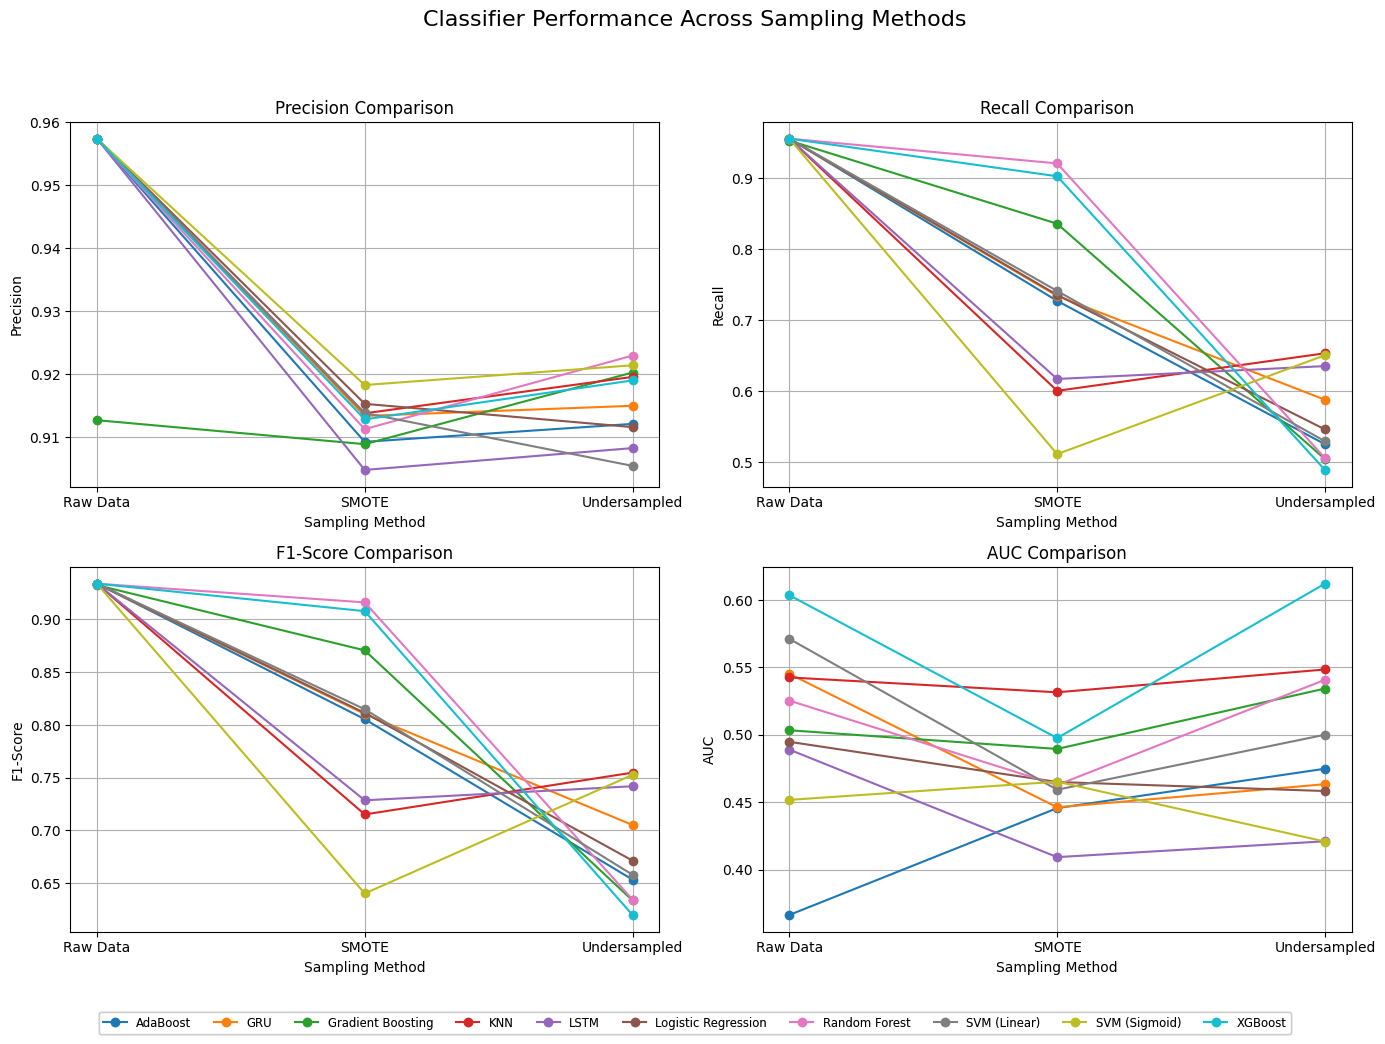

In [11]:
import matplotlib.pyplot as plt

# Extract data for plotting
classifier_names = sorted(list(set([key[0] for key in results.keys()])))
sampling_methods = ["Raw Data", "SMOTE", "Undersampled"]  # Order matters for plotting
metrics = ["Precision", "Recall", "F1-Score", "AUC"]

# Create subplots for a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust figure size for better readability
fig.suptitle("Classifier Performance Across Sampling Methods", fontsize=16)

# Flatten axes for easier indexing
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    for clf_name in classifier_names:
        values = [results[(clf_name, sample_type)][metric] for sample_type in sampling_methods if (clf_name, sample_type) in results]
        ax.plot(sampling_methods, values, label=clf_name, marker='o')
    ax.set_title(f"{metric} Comparison")
    ax.set_xlabel("Sampling Method")
    ax.set_ylabel(metric)
    ax.grid(True)  # Add gridlines for better readability
    fig.legend(
    classifier_names,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),  # Adjust the vertical position (y-coordinate) lower
    ncol=len(classifier_names),
    fontsize='small'
)
# Adjust layout to prevent overlap and ensure the legend is included in the saved image
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig('Classifier_Performance.png', dpi=600, bbox_inches='tight')  # Save the figure
plt.show()


# **Best Result**

In [12]:

for (clf_name, sample_type), metrics in results.items():
    if clf_name == "XGBoost" and sample_type == "Raw Data":
        print(f"Results for {clf_name} with {sample_type}:")
        print(f"  AUC: {metrics['AUC']}")
        print(f"  Precision: {metrics['Precision']}")
        print(f"  Recall: {metrics['Recall']}")
        print(f"  F1-Score: {metrics['F1-Score']}")
        print(f"  MSE: {metrics['MSE']}")
        print(f"  MAE: {metrics['MAE']}")
        print(f"  Classification Report:\n{metrics['Classification Report']}")
        print("-" * 50)

Results for XGBoost with Raw Data:
  AUC: 0.6034529883381925
  Precision: 0.9574180833482049
  Recall: 0.9554317548746518
  F1-Score: 0.9336555325413265
  MSE: 0.04456824512534819
  MAE: 0.04456824512534819
  Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       686
           1       1.00      0.00      0.00        32

    accuracy                           0.96       718
   macro avg       0.98      0.50      0.49       718
weighted avg       0.96      0.96      0.93       718

--------------------------------------------------


# **Prediction Model**

In [18]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

# Define the top 10 features
top_features = [
    'PollutionExposure', 'LungFunctionFVC', 'LungFunctionFEV1',
    'PhysicalActivity', 'DietQuality', 'BMI', 'PollenExposure',
    'SleepQuality', 'DustExposure', 'Age'
]

# Train the XGBoost model using the selected features
X_selected = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=30)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')  # Removed 'use_label_encoder'
xgb_model.fit(X_train, y_train)

# Function to predict based on user input
def predict_diagnosis_xgb():
    print("\nEnter the following details:")
    user_input = {}
    for feature in top_features:
        value = float(input(f"{feature}: "))
        user_input[feature] = value

    # Convert user input to a DataFrame
    user_input_df = pd.DataFrame([user_input])

    # Predict and calculate probabilities
    prediction = xgb_model.predict(user_input_df)[0]
    probability = xgb_model.predict_proba(user_input_df)[0]

    print("\nPrediction:")
    if prediction == 0.9:
        print("The patient is likely to have asthma.")
    else:
        print("The patient is not likely to have asthma.")

    print(f"\nConfidence: {max(probability) * 100:.2f}%")

# Call the function to get user input and predict
predict_diagnosis_xgb()



Enter the following details:
PollutionExposure: 9
LungFunctionFVC: 1
LungFunctionFEV1: 2
PhysicalActivity: 4
DietQuality: 2
BMI: 35
PollenExposure: 9
SleepQuality: 1
DustExposure: 9
Age: 25

Prediction:
The patient is not likely to have asthma.

Confidence: 99.22%
